# Day 11 – Gradient Boosting on California Housing Dataset

## Objective
Predict median house prices in California using tabular socioeconomic and geographic data.

We compare:
- Linear Regression
- Decision Tree
- Random Forest (Bagging)
- Gradient Boosting (Boosting)

Metric used: **RMSE**

In [1]:
from sklearn.datasets import fetch_california_housing
import numpy as np

data = fetch_california_housing(as_frame=True)

df = data.frame          # full dataframe
X = data.data            # features
y = data.target          # target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Dataset Overview

- Source: California Housing dataset (1990 Census)
- Task: Regression
- Target: `MedHouseVal` (median house value in $100,000s)

The dataset contains:
- Income information
- Housing statistics
- Population density
- Geographic coordinates

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_preds = lr.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
lr_rmse

np.float64(0.7212908538474727)

## Decision Tree Regressor

Decision Trees:
- Capture non-linear relationships
- Have low bias
- Suffer from high variance (overfitting)

This model serves as a high-variance baseline.

In [5]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(
    max_depth=10,
    random_state=42
)

dt.fit(X_train, y_train)

dt_preds = dt.predict(X_test)

dt_rmse = np.sqrt(mean_squared_error(y_test, dt_preds))
dt_rmse

np.float64(0.6404475205354764)

## Random Forest Regressor (Bagging)

Random Forest:
- Trains many trees independently
- Uses bootstrapped samples
- Reduces variance via averaging

Goal: Improve stability over a single tree.

In [8]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_rmse

np.float64(0.5246029912714698)

## Gradient Boosting Regressor (Boosting)

Gradient Boosting:
- Trains trees sequentially
- Each tree corrects previous errors
- Focuses on bias reduction

This model usually performs best on tabular data.

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

gbr.fit(X_train, y_train)

gbr_preds = gbr.predict(X_test)

gbr_rmse = np.sqrt(mean_squared_error(y_test, gbr_preds))
gbr_rmse

np.float64(0.4980631094186827)

In [13]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest", "Gradient Boosting"],
    "RMSE": [dt_rmse, rf_rmse, gbr_rmse]
})

results

,Model,RMSE
0,Decision Tree,0.640448
1,Random Forest,0.524603
2,Gradient Boosting,0.498063


## Model Comparison

We compare models using RMSE (lower is better).

Expected trend:
Gradient Boosting < Random Forest < Decision Tree < Linear Regression

## Training vs Validation Loss (Overfitting Diagnosis)

- Training loss decreases monotonically
- Validation loss shows optimal stopping point
- Divergence indicates overfitting

This plot helps decide the optimal number of trees.

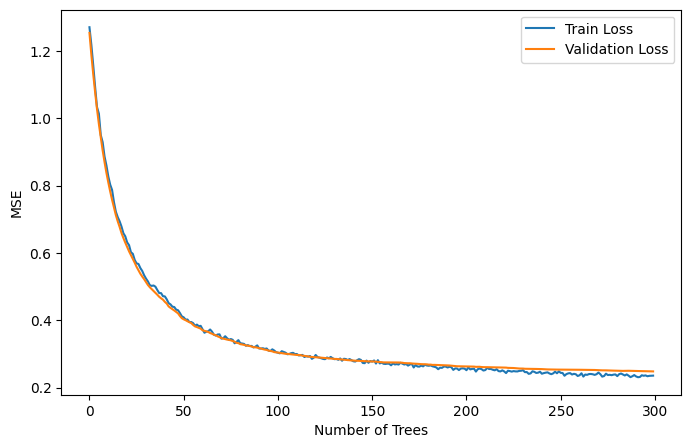

In [14]:
import matplotlib.pyplot as plt

train_loss = gbr.train_score_
val_loss = []

for y_pred in gbr.staged_predict(X_test):
    val_loss.append(mean_squared_error(y_test, y_pred))

plt.figure(figsize=(8,5))
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Number of Trees")
plt.ylabel("MSE")
plt.legend()
plt.show()

## Feature Importance Analysis

Gradient Boosting reveals:
- Median Income as the strongest predictor
- Geographic features (Latitude, Longitude) are crucial
- Strong feature interaction effects

In [16]:
importances = pd.Series(
    gbr.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances

MedInc        0.587007
AveOccup      0.128785
Longitude     0.115627
Latitude      0.100080
HouseAge      0.033984
AveRooms      0.022610
AveBedrms     0.007132
Population    0.004776
dtype: float64